# THYROID DISEASE DATASET PREPARATION & CLEANING

In [52]:
# Import libraries that will assist in cleaning

# Pandas for data manipulation and numpy for numeric operations

import pandas as pd
import numpy as np

In [53]:
# Load the thyroid dataset

data1 = pd.read_csv('/Users/RyanMburu/Desktop/DS Projects/Thyroid Disease Detector/hypothyroid.csv')

# Print out first 5 rows
data1.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [54]:
# Print out last 5 rows
data1.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [55]:
# Gather number of rows and columns present

data1.shape

(3772, 30)

The Hypothyroid dataset has 3,770 rows of data with 30 columns

In [56]:
# Check datatypes
data1.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

# DATA CLEANING

The data cleaning stage will be separated into 5 stages

1. Validity
2. Accuracy
3. Consistency
4. Completeness
5. Uniformity

## 1. Validity

In [57]:
# Will remove columns useless for our analysis and building ML model

# Columns that say whether TT4, TSH columns are measured or not are redundant as patients with no data do not help our analysis

data1 = data1.drop(columns=['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'], axis=1)
data1.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,1.3,2.5,125,1.14,109,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,4.1,2,102,?,?,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,0.98,?,109,0.91,120,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,0.16,1.9,175,?,?,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,0.72,1.2,61,0.87,70,?,SVI,P


In [58]:
# Will drop TBG column as well as its just question marks
data1 = data1.drop(columns=['TBG'], axis=1)
data1.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,?,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,?,109,0.91,120,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,?,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P


The data is deemed valid.

## 2. Accuracy

- This is where the data is checked for mathematical accuracy.

- Due to my lack of expertise in the medical field, it will be assumed that the data is mathematically accurate and the nymerical data is in the right format.

## 3. Completeness

- This is where the data is ensured to be complete.

- Null Values will be handled here

In [59]:
# Handling null values

data1.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

The pandas operation claims that there are no null values present in the data. This is so as null values in our data are showen by the '?' mark.

- '?' marks will be replaced by NULL

In [60]:
# Replace '?' with NULL

data1 = data1.replace('?', np.NaN)
data1

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,P


In [61]:
# Check sum of null values per column
data1.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral source                0
binaryClass                    0
dtype: int64

Will replace null values of gender with 'Not Specified' and the rest will be dropped

In [62]:
# Replace null values in sex with 'NS' (Not Specified)

data1['sex'] = data1['sex'].fillna('NS')

In [92]:
data1['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [77]:
# Will proceed to drop rows with null values, to avoid inconsistency when modelling

data2 = data1.dropna().reset_index()
data2

,index,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,0,41,F,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,4,70,F,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P
2,7,80,F,f,f,f,f,f,f,f,...,f,f,f,2.2,0.6,80,0.7,115,SVI,P
3,8,66,F,f,f,f,f,f,f,f,...,t,f,f,0.6,2.2,123,0.93,132,SVI,P
4,9,68,M,f,f,f,f,f,f,f,...,f,f,f,2.4,1.6,83,0.89,93,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,3766,19,F,f,f,f,f,f,f,f,...,f,f,f,8.8,2.7,108,1.11,97,other,N
2747,3768,68,F,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,P
2748,3769,74,F,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,P
2749,3770,72,M,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,P


In [78]:
# Drop index column
data2.drop(columns=['index'], axis=1, inplace=True)

In [79]:
# Check null values
data2.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

- About 900 records of data were lost, but our data now has no null values.

- Saved about 200 records by changing null values in gender with NS, as I predict the sex column will not be crucial in predicting the model's output

## 4. Consistency

- This is where duplicate values are inspected and dropped if any.

In [80]:
# Checking for duplicates

data2.duplicated().sum()

1

Only one duplicated value, which will be dropped from our data

In [81]:
# Drop the duplicate
data2 = data2.drop_duplicates()

# Check again if there is any duplicate value
data2.duplicated().sum()

0

No more duplicates. Our data is consistent

## 5. Uniformity

This is where the data should be the same i.e data types and column names are in the same format etc

In [82]:
data2.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.2,0.6,80,0.7,115,SVI,P
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.6,2.2,123,0.93,132,SVI,P
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.4,1.6,83,0.89,93,SVI,P


In [83]:
# Will change last column name to outcome in lowercase for uniformity purposes

data2 = data2.rename(columns={'binaryClass' : 'output'})
data2.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.2,0.6,80,0.7,115,SVI,P
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.6,2.2,123,0.93,132,SVI,P
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.4,1.6,83,0.89,93,SVI,P


In [84]:
# Check for datatypes

data2.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
referral source              object
output                       object
dtype: object

In [85]:
# Will change age, TSH, T3, TT4, T4U and FTI to integer and float datatypes

data2['age'] = data2['age'].astype(int)

data2[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = data2[['TSH', 'T3', 'TT4', 'T4U', 'FTI']].astype(float)

In [86]:
data2.dtypes

age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral source               object
output                        object
dtype: object

Data types are uniform and satisfactory.

In [87]:
# Final dataset
data2

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,P
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,P
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,19,F,f,f,f,f,f,f,f,f,...,f,f,f,8.80,2.7,108.0,1.11,97.0,other,N
2747,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,P
2748,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,P
2749,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,P


## Encoding

Will encode the output of the dataset to 1s and 0s, as Machine Learning models take integers only as y input.

In [88]:
# Will encode the output column to 0 and 1

# So as to use as minimal libraries as possible, will not call the hot one encoder library from sklearn

# Will encode traditionally by find and replace method

codes = {'output' : {'P' : 0, 'N' : 1}}

codes

{'output': {'P': 0, 'N': 1}}

In [90]:
# Replace them in dataset

data2= data2.replace(codes)
data2.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


In [91]:
# Value count the output column
data2['output'].value_counts()

0    2527
1     223
Name: output, dtype: int64

## Outliers

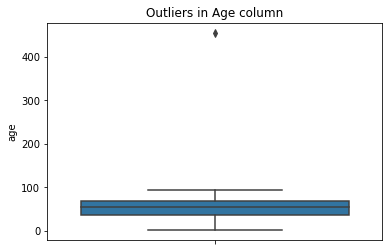

In [96]:
# Will check for outliers using boxplots

# Will check in the age column, as the rest of the numeric columns are measurements taken by doctors
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = data2, y = 'age')
plt.title('Outliers in Age column')
plt.show()

There was a wrong data input, as it states there is a patient over 400 years, which is not possible.

The outliers will be handled

In [101]:
# Will use the Interquantile Range (IQR) method where data in the upper limit of 75% and lower limit of 15% will be excluded from our data

# Quantiles
q25 = data2['age'].quantile(0.25)
q75 = data2['age'].quantile(0.75)

# The lower quantile age is 37 years and the upper quantile age is 68 years old

# Will calqulate the IQR
IQR = q75 - q25

# Will specify the lower and upper limit
lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

# as our outliers are only present in the high values, will only use upper quantile. Any values over the upper quantile (115 years) will be dropped
data2 = data2[data2['age'] < upper_limit]

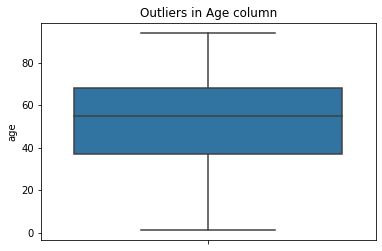

In [102]:
# Check for outliers again
sns.boxplot(data = data2, y = 'age')
plt.title('Outliers in Age column')
plt.show()

No more outliers present in our data.

## Exporting dataset

In [93]:
# Will export clean dataset as a csv file

data2.to_csv('clean_hypothyroid2.csv')